In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/sahibinden.csv")

In [2]:
df["town"].value_counts()

town
Merkez       838
Kavaklı      436
Gürpınar     389
Silivri      343
Çakmak       327
            ... 
Gümüşyaka      2
Eminönü        1
Tahtakale      1
Ortaköy        1
Sirkeci        1
Name: count, Length: 166, dtype: int64

In [3]:
df["district"].value_counts()

district
Adnan Kahveci Mah.    322
Göktürk Merkez Mh.    298
Atatürk Mh.           263
Maslak Mah.           235
Şenlikköy Mh.         226
                     ... 
Paşaköy Mh.             1
Evliya Çelebi Mh.       1
Dizdariye Mah.          1
Ulus Mah.               1
Fetihtepe Mah.          1
Name: count, Length: 392, dtype: int64

In [4]:
df.head()

,Unnamed: 0,title,area,numberOfRooms,price,town,district
0,0,"Tepeköyde Full Eşyalı, 2+1 Bahçe katı Daire",110.0,2+1,15.000,Büyükada,Maden Mh.
1,1,BURGAZADADA FULL EŞYALI 2+1 KİRALIK DAİRE,80.0,2+1,7.500,Burgazada,Burgazada Mh.
2,2,HEYBELİADA'DA 1 EKIM -15 MAYIS KİRALIK BAHÇEKATI,120.0,2+1,8.000,Heybeliada,NaN
3,3,Adalar Kınalı Ada Dublex Full Deniz Manzaralı ...,130.0,3+1,15.000,Kınalıada,Kınalıada Mh.
4,4,HEYBELİADA'DA 3+1 DUBLEKS EŞYALI KİRALIK DAİRE,110.0,3+1,8.500,Heybeliada,NaN


In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'area', 'numberOfRooms', 'price', 'town',
       'district'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0          0
title               0
area                0
numberOfRooms       0
price               0
town                0
district         1001
dtype: int64

In [7]:
df['district'] = df.groupby('town')['district'].transform(lambda x: x.ffill())

/tmp/ipykernel_22422/3392624145.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['district'] = df.groupby('town')['district'].transform(lambda x: x.ffill())


In [8]:
df.drop(columns=["town", "Unnamed: 0", "title"], inplace=True)

In [9]:
df.info

<bound method DataFrame.info of         area numberOfRooms   price       district
0      110.0           2+1  15.000      Maden Mh.
1       80.0           2+1   7.500  Burgazada Mh.
2      120.0           2+1   8.000            NaN
3      130.0           3+1  15.000  Kınalıada Mh.
4      110.0           3+1   8.500            NaN
...      ...           ...     ...            ...
10940   80.0           2+1   8.500    Çırpıcı Mh.
10941   58.0           1+1  15.000            NaN
10942  135.0           3+1   9.000      Sümer Mh.
10943  135.0           3+1   9.000      Sümer Mh.
10944   73.0           1+1  12.000      Sümer Mh.

[10945 rows x 4 columns]>

In [10]:
df["price"] = df["price"].replace(".", "")
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [11]:
df["price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10945 entries, 0 to 10944
Series name: price
Non-Null Count  Dtype  
--------------  -----  
10941 non-null  float64
dtypes: float64(1)
memory usage: 85.6 KB


In [12]:
df.info
df.isnull().any()

area             False
numberOfRooms    False
price             True
district          True
dtype: bool

In [13]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower) & (df['price'] <= upper)]
df = df.copy()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler_price= StandardScaler()
df["price"] = scaler_price.fit_transform(df[["price"]])

df["price"] = (df["price"] - df["price"].mean()) / df["price"].std()

district_mean = df.groupby("district")["price"].mean()
df["district"] = df['district'].map(district_mean)

In [16]:
df["price_per_m2"] = df["area"]/df["price"]
scaler_price_m2= StandardScaler()
df["price_per_m2"] = scaler_price_m2.fit_transform(df[["price_per_m2"]])

In [17]:
df["numberOfRooms"] = df["numberOfRooms"].apply(lambda x: sum(map(float, x.split("+"))))

In [18]:
df["area_per_room"] = df["area"] / df["numberOfRooms"] 
scaler_apr = StandardScaler()
df["area_per_room"] = scaler_apr.fit_transform(df[["area_per_room"]])

scaler_area = StandardScaler()
df["area"] = scaler_area.fit_transform(df[["area"]])

scaler_nor= StandardScaler()
df["numberOfRooms"] = scaler_nor.fit_transform(df[["numberOfRooms"]])

In [19]:
df.isnull().any()

area             False
numberOfRooms    False
price            False
district          True
price_per_m2     False
area_per_room    False
dtype: bool

In [20]:
df.dropna(inplace=True)

In [21]:
import torch
torch.cuda.empty_cache()	
import torchvision.models as models
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Dataset
import torch.optim as optim
from tqdm import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
class HouseDataset(Dataset):
    def __init__(self, dataframe):
        self.X = torch.tensor(dataframe.drop(columns = ["price", "sample_weight"]).values, dtype=torch.float32)
        self.y = torch.tensor(dataframe["price"].values, dtype = torch.float32).unsqueeze(1)
        self.w = torch.tensor(dataframe["sample_weight"].values, dtype = torch.float32).unsqueeze(1)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx], self.w[idx]

In [23]:
from sklearn.model_selection import train_test_split
df = df[(df["price"] > -1.6) & (df["price"] <= 2.8)]
train_df, test_df = train_test_split(df, test_size=0.2, random_state = 42)

train_df["sample_weight"] = np.where(train_df["price"] > 2.0, 2.0, 1.0)
test_df["sample_weight"] = 1.0

train_dataset = HouseDataset(train_df)
test_dataset = HouseDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size = 256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 256, shuffle=False)

In [24]:
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(5, 128),
            nn.BatchNorm1d(128),
            nn.Tanh(),
            nn.Dropout(0.2),
        
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.1),
        
            nn.Linear(64, 32),
            nn.ReLU(),
        
            nn.Linear(32, 1),
        )
    def forward(self, x):
        return self.model(x)

In [25]:
model = FFNN().to("cuda")

In [26]:
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.SmoothL1Loss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=4)

In [27]:
def train_model(model, dataloader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    total = 0
    for x, y, w in dataloader:
        x, y, w = x.to("cuda"), y.to("cuda"), w.to("cuda")
        out = model(x).view(-1)
        y = y.view(-1)
        loss = criterion(out, y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        running_loss += loss.item() * y.size(0)
        total += y.size(0)
    return running_loss / total

In [28]:
def evaluate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    total = 0
    with torch.no_grad():
        for x, y, w in dataloader:
            x, y, w = x.to("cuda"), y.to("cuda"), w.to("cuda")
            outputs = model(x).view(-1)
            y = y.view(-1)
            loss = criterion(outputs, y)
            running_loss += loss.item() * y.size(0)
            total += y.size(0)
    return running_loss / total

In [29]:
train_losses, val_losses, lr = [], [], []
epochs = 150
best_val_loss=float("inf")
patience=16
counter=0
for epoch in range(epochs):
    train_loss = train_model(model, train_loader, optimizer, criterion)
    val_loss = evaluate(model, test_loader, criterion)
    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        counter +=1 
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    lr.append(scheduler.get_last_lr()[0])
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Val   Loss: {val_loss:.4f}")
    print(f"  LR: {scheduler.get_last_lr()[0]:.6f}")

Epoch 1/150
  Train Loss: 0.2390
  Val   Loss: 0.1741
  LR: 0.001000
Epoch 2/150
  Train Loss: 0.1827
  Val   Loss: 0.1998
  LR: 0.001000
Epoch 3/150
  Train Loss: 0.1850
  Val   Loss: 0.1899
  LR: 0.001000
Epoch 4/150
  Train Loss: 0.1816
  Val   Loss: 0.1591
  LR: 0.001000
Epoch 5/150
  Train Loss: 0.1659
  Val   Loss: 0.1505
  LR: 0.001000
Epoch 6/150
  Train Loss: 0.1554
  Val   Loss: 0.1354
  LR: 0.001000
Epoch 7/150
  Train Loss: 0.1510
  Val   Loss: 0.1391
  LR: 0.001000
Epoch 8/150
  Train Loss: 0.1427
  Val   Loss: 0.1272
  LR: 0.001000
Epoch 9/150
  Train Loss: 0.1507
  Val   Loss: 0.1259
  LR: 0.001000
Epoch 10/150
  Train Loss: 0.1363
  Val   Loss: 0.1152
  LR: 0.001000
Epoch 11/150
  Train Loss: 0.1281
  Val   Loss: 0.1221
  LR: 0.001000
Epoch 12/150
  Train Loss: 0.1217
  Val   Loss: 0.1051
  LR: 0.001000
Epoch 13/150
  Train Loss: 0.1219
  Val   Loss: 0.0975
  LR: 0.001000
Epoch 14/150
  Train Loss: 0.1076
  Val   Loss: 0.0972
  LR: 0.001000
Epoch 15/150
  Train Loss: 0.

In [30]:
model.load_state_dict(torch.load("best_model.pt"))

<All keys matched successfully>

In [31]:
def test_model(model, dataloader):
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y, w in dataloader:
            x, y = x.to("cuda"), y.to("cuda")
            outputs = model(x)
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(y.cpu().numpy().squeeze())
        return all_preds, all_labels

In [32]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import numpy as np
y_pred, y_true = test_model(model, train_loader)
y_true = scaler_price.inverse_transform(np.array(y_true).reshape(-1, 1))
y_pred = scaler_price.inverse_transform(np.array(y_pred).reshape(-1, 1))

mae = mean_absolute_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

MAE: 0.62, RMSE: 1.00, R²: 0.9689


In [33]:
import matplotlib.pyplot as plt

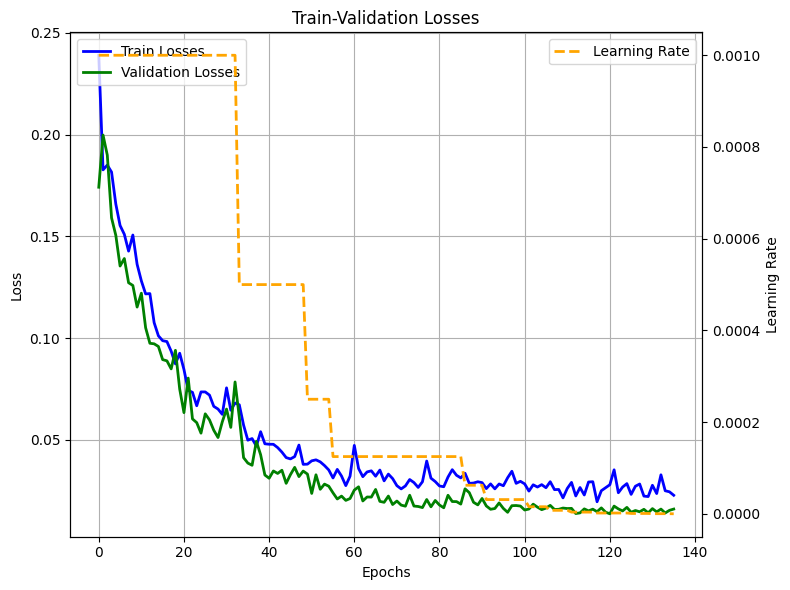

In [34]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(train_losses, ls="-", lw=2, c = "b", label="Train Losses")
ax1.plot(val_losses, ls="-", lw=2, c = "g", label="Validation Losses")
ax1.set_title("Train-Validation Losses")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper left")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(lr, ls="--", lw=2, c="orange", label="Learning Rate")
ax2.set_ylabel("Learning Rate")
ax2.legend(loc="upper right")
             
plt.tight_layout()
plt.show()

In [35]:
def plot_scatter(y_true, y_pred):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.5, c="blue")
    plt.plot([min(y_true), max(y_true)], [min(y_pred), max(y_pred)])
    plt.xlabel("Gerçek Fiyat")
    plt.ylabel("Tahmin Edilen Fiyat")
    plt.title("Gerçek vs Tahmin")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [36]:
def plot_error_histogram(y_true, y_pred):
    errors = y_pred - y_true
    plt.figure(figsize=(7, 5))
    plt.hist(errors, bins=50, color='purple', alpha=0.7)
    plt.xlabel("Tahmin Hatası")
    plt.ylabel("Frekans")
    plt.title("Hata Histogramı")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [37]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8,6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color="r", linestyle="--")
    plt.xlabel("Tahmin Edilen Fiyat")
    plt.ylabel("Residual (Gerçek - Tahmin)")
    plt.title("Residual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_22422/3422316377.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


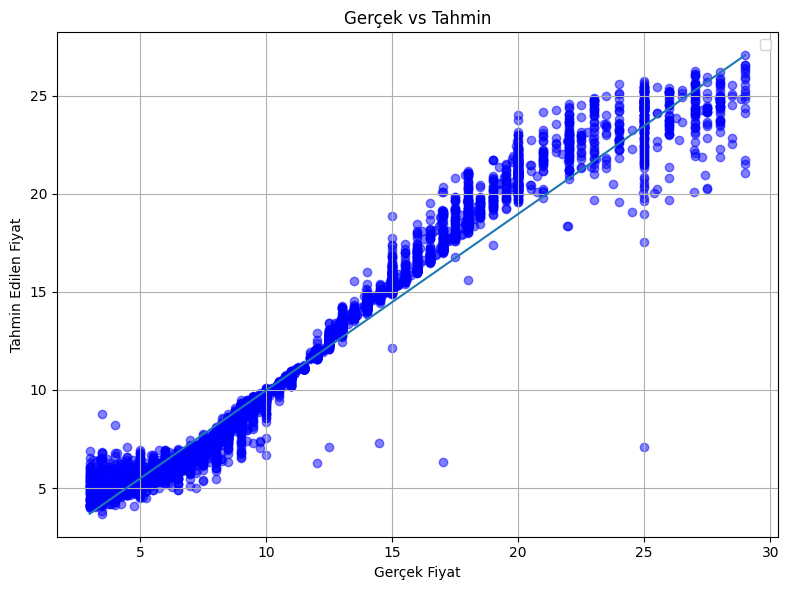

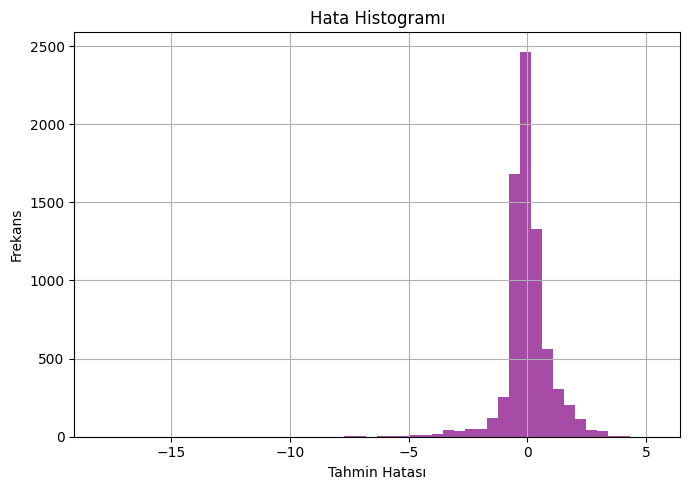

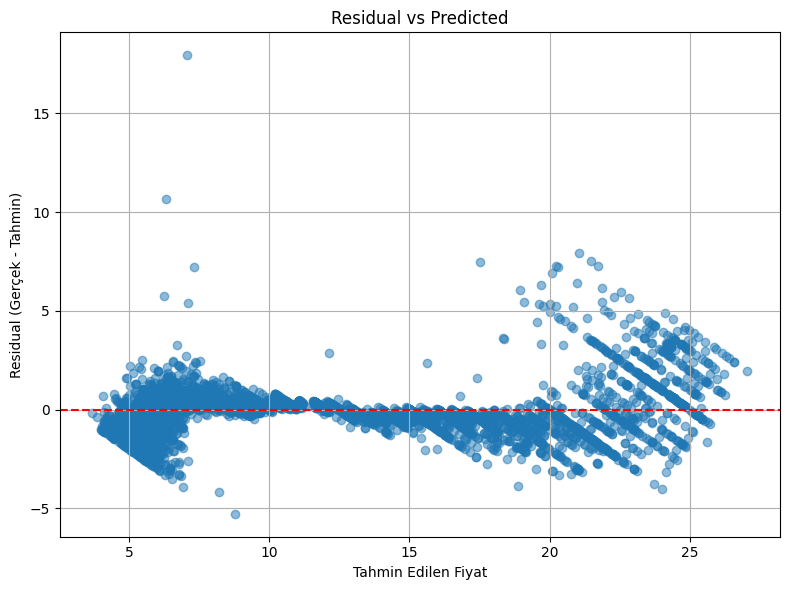

In [38]:
plot_scatter(y_true, y_pred)
plot_error_histogram(y_true, y_pred)
plot_residuals(y_true, y_pred)

In [39]:
from captum.attr import FeaturePermutation

/home/tunahan/anaconda3/envs/ml_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
df.columns

Index(['area', 'numberOfRooms', 'price', 'district', 'price_per_m2',
       'area_per_room'],
      dtype='object')

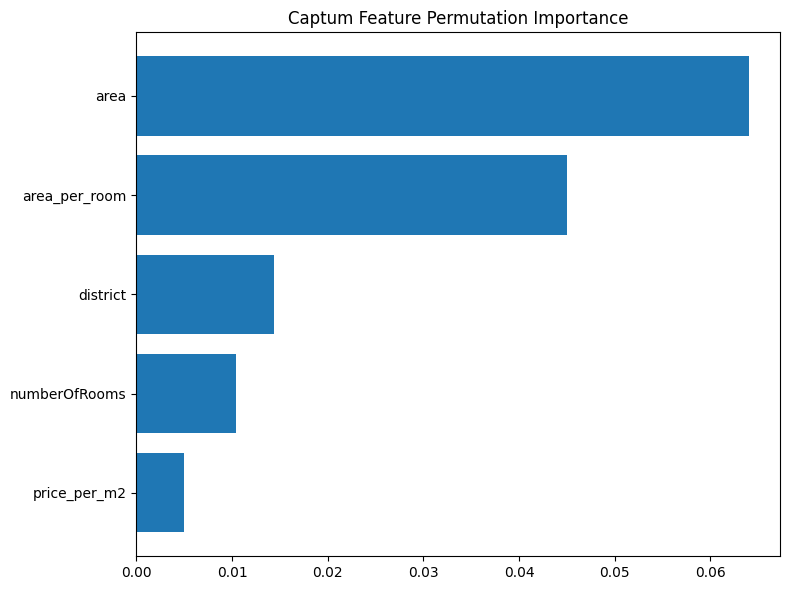

In [41]:
model.eval()
for batch in test_loader:
    X_batch, y_batch, w = batch
    X_batch = X_batch.to("cuda")
    break  
    
perm = FeaturePermutation(model)
attr = perm.attribute(X_batch)
importances = attr.mean(dim=0).cpu().detach().numpy()
feature_names = ['area', 'numberOfRooms', 'district', 'price_per_m2','area_per_room']

sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(8,6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.title("Captum Feature Permutation Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()